# **1. Perkenalan Dataset**


### Dataset yang digunakan: Stunting Toddler (Balita) Detection (121K rows)
### Sumber: Kaggle (https://www.kaggle.com/datasets/rendiputra/stunting-balita-detection-121k-rows)
Dataset ini berisi sekitar 121.000 data balita usia 0–60 bulan, digunakan untuk mendeteksi kondisi stunting berdasarkan standar WHO (World Health Organization) menggunakan rumus z-score.


# **2. Import Library**

In [1]:
%pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# **3. Memuat Dataset**

In [3]:
# Create dataframe
df = pd.read_csv("../data_balita_raw.csv")
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Akan dilakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


### Ringkasan Dataset
- Jumlah Data
Dataset ini terdiri dari 120.999 baris data, dengan 4 fitur utama yang merepresentasikan informasi pertumbuhan dan status gizi anak usia 0–60 bulan.

### Penjelasan fitur-fitur dataset
- Umur (bulan)
Merupakan usia anak dalam satuan bulan, berkisar dari 0 hingga 60 bulan. Fitur ini penting untuk menentukan fase pertumbuhan anak dan digunakan dalam perhitungan status gizi.

- Jenis Kelamin
Menunjukkan jenis kelamin anak, dengan dua kategori: male (laki-laki) dan female (perempuan). Faktor ini dapat memengaruhi pola pertumbuhan anak.

- Tinggi Badan (cm)
Menyatakan tinggi badan anak dalam sentimeter. Fitur ini menjadi indikator utama dalam menentukan apakah seorang anak mengalami stunting atau tidak.

- Status Gizi
    - Label atau target dari dataset yang mengkategorikan status gizi anak menjadi:

    - severely stunted: sangat pendek, z-score < -3

    - stunted: pendek, -3 ≤ z-score < -2

    - normal: tinggi badan sesuai usia, -2 ≤ z-score ≤ +3

    - tall: tinggi, z-score > +3

  
Kategori ini ditentukan berdasarkan standar z-score dari WHO dan digunakan untuk klasifikasi dalam model.

In [5]:
df.describe()

,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010437
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


### Insight dari Statistik Deskriptif
- Umur (bulan):

    - Jumlah data: 120.999 entri

    - Usia anak berada dalam rentang 0 hingga 60 bulan, sesuai dengan usia balita.

    - Rata-rata usia: 30,17 bulan, artinya sebagian besar anak berada di tengah rentang usia (sekitar 2,5 tahun).

    - 50% anak berusia ≤ 30 bulan (nilai median).

    - 75% anak berusia ≤ 45 bulan, menunjukkan distribusi usia cenderung merata.

- Tinggi Badan (cm):

    - Tinggi badan berkisar antara 40,01 cm hingga 128 cm.

    - Rata-rata tinggi badan adalah 88,66 cm, yang selaras dengan usia rata-rata anak.

    - Sebanyak 50% anak memiliki tinggi badan ≤ 89,8 cm (median).

    - 25% anak memiliki tinggi ≤ 77 cm, menunjukkan ada sekelompok anak dengan tinggi badan relatif rendah.

    - 75% anak memiliki tinggi ≤ 101,2 cm, mencerminkan batas atas mayoritas data.


## Univariate Analysis

In [6]:
numerical_features = ["Umur (bulan)", "Tinggi Badan (cm)"]
categorical_features = ["Jenis Kelamin", "Status Gizi"]

### Categorical Features


Distribusi data untuk Jenis Kelamin:
                jumlah sampel  persentase
Jenis Kelamin                           
perempuan              61002        50.4
laki-laki              59997        49.6


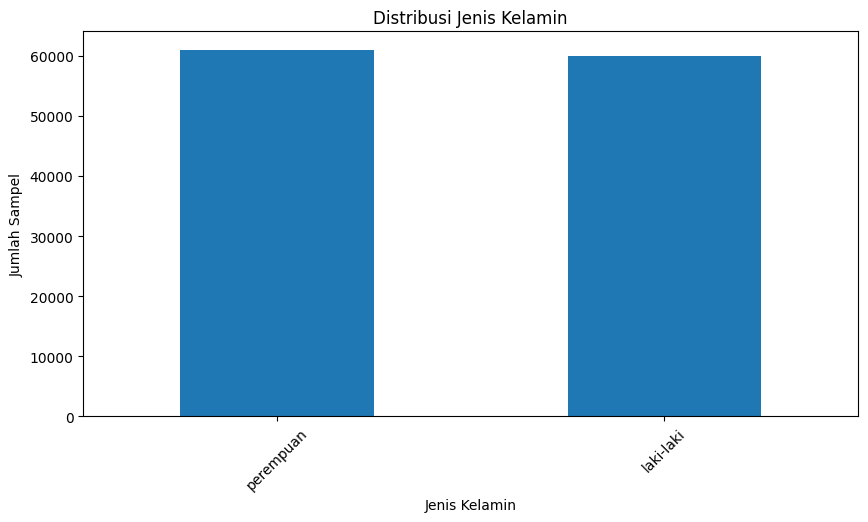


Distribusi data untuk Status Gizi:
                   jumlah sampel  persentase
Status Gizi                                
normal                    67755        56.0
severely stunted          19869        16.4
tinggi                    19560        16.2
stunted                   13815        11.4


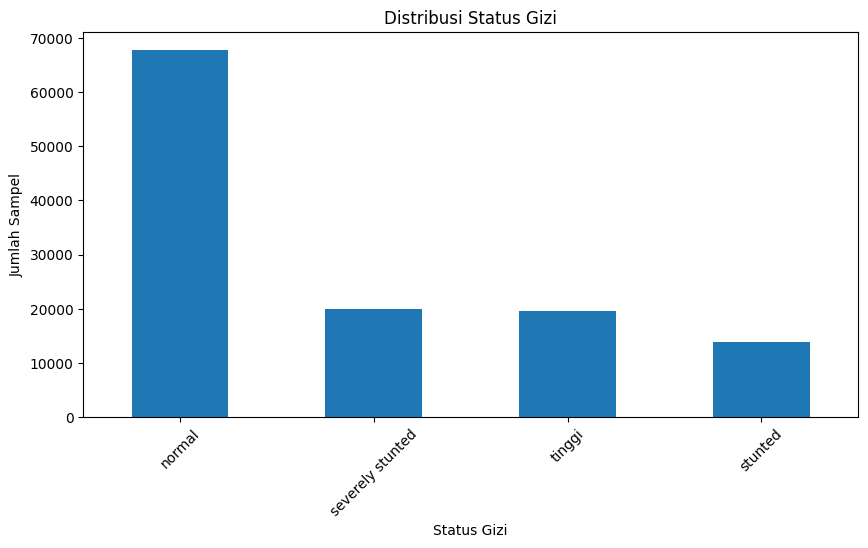

In [7]:
for feature in categorical_features:
    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)

    df_summary = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
    print(f"\nDistribusi data untuk {feature}:\n", df_summary)

    plt.figure(figsize=(10, 5))
    count.plot(kind='bar', title=f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Jumlah Sampel')
    plt.xticks(rotation=45)
    plt.show()

### Distribusi Jenis Kelamin
- Dataset memiliki distribusi seimbang antara anak laki-laki dan perempuan.

- Perempuan: 61.002 sampel (50.4%).

- Laki-laki: 59.997 sampel (49.6%).

Hal ini menunjukkan tidak ada bias signifikan terkait jenis kelamin dalam pengambilan data.

### Distribusi Status Gizi
- Normal adalah status gizi terbanyak: 67.755 anak (56.0%), menunjukkan mayoritas anak memiliki pertumbuhan yang sehat.

- Severely stunted (sangat pendek): 19.869 anak (16.4%), merupakan kelompok dengan kondisi serius dan perlu perhatian lebih.

- Tinggi (di atas rata-rata): 19.560 anak (16.2%), mencerminkan sebagian anak memiliki pertumbuhan tinggi yang baik.

- Stunted (pendek): 13.815 anak (11.4%), juga merupakan kelompok berisiko stunting namun tidak seberat kategori severely stunted.

Kesimpulan: Meski sebagian besar anak dalam kondisi normal, sekitar 27.8% dari total data menunjukkan indikasi stunting (11.4% stunted + 16.4% severely stunted), yang cukup signifikan sebagai dasar analisis.

### Numerical Features

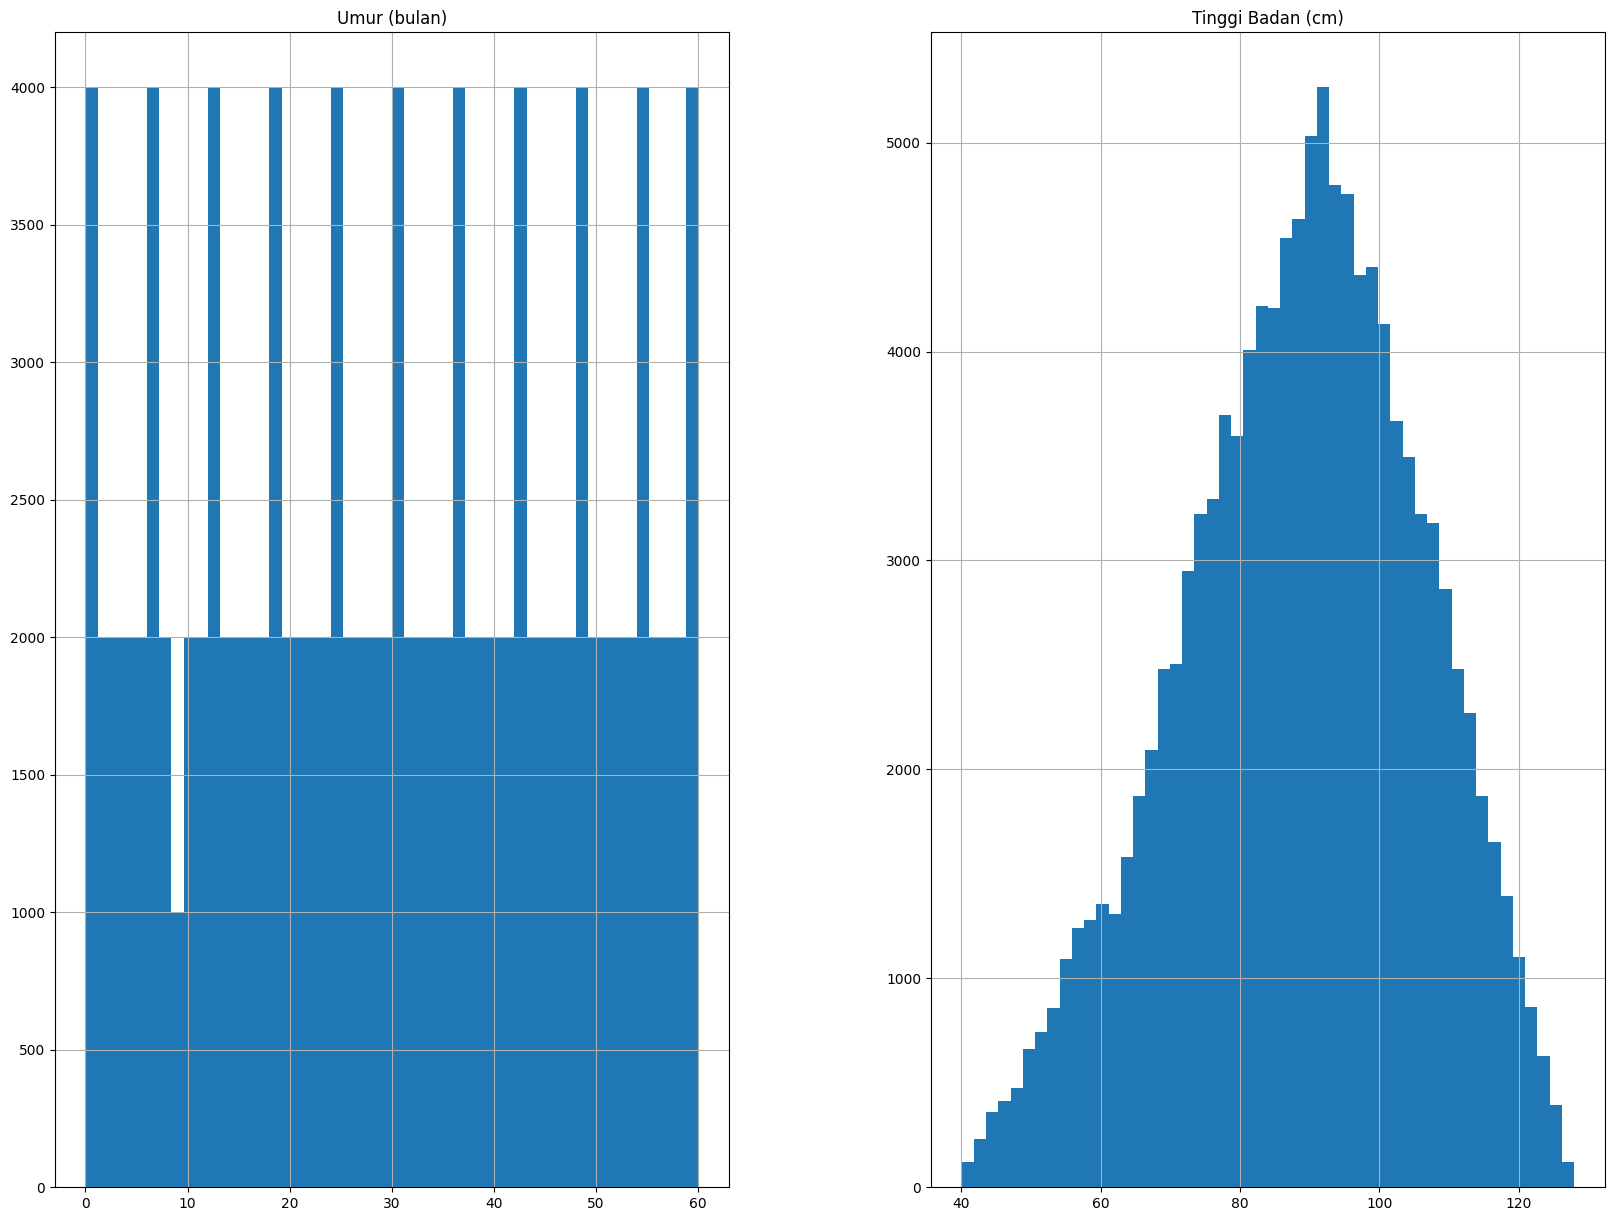

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Distribusi Umur (bulan)
- Terlihat distribusi relatif seragam dari usia 0 hingga 60 bulan.

- Setiap kelompok usia memiliki jumlah data yang hampir sama, kecuali pada usia 0–10 bulan yang sedikit lebih rendah.

Distribusi ini menunjukkan bahwa data dikumpulkan secara merata di seluruh rentang usia, mencerminkan representasi yang adil dari kelompok usia balita.

### Distribusi Tinggi Badan (cm)
- Distribusi membentuk kurva lonceng (bell-shaped) yang simetris, mengindikasikan data tinggi badan terdistribusi normal (Gaussian).

- Puncak distribusi berada di sekitar 90 cm, yang merupakan tinggi badan rata-rata balita dalam dataset.

Data tinggi badan tersebar dari sekitar 40 cm hingga 128 cm, mencakup variasi pertumbuhan anak dari sangat pendek hingga sangat tinggi.

### Kesimpulan:
- Distribusi umur merata → dataset cocok untuk analisis lintas kelompok umur.

- Distribusi tinggi badan normal → dapat mempermudah model pembelajaran mesin dalam memahami pola pertumbuhan yang umum dan mendeteksi anomali (misalnya stunting atau sangat tinggi).
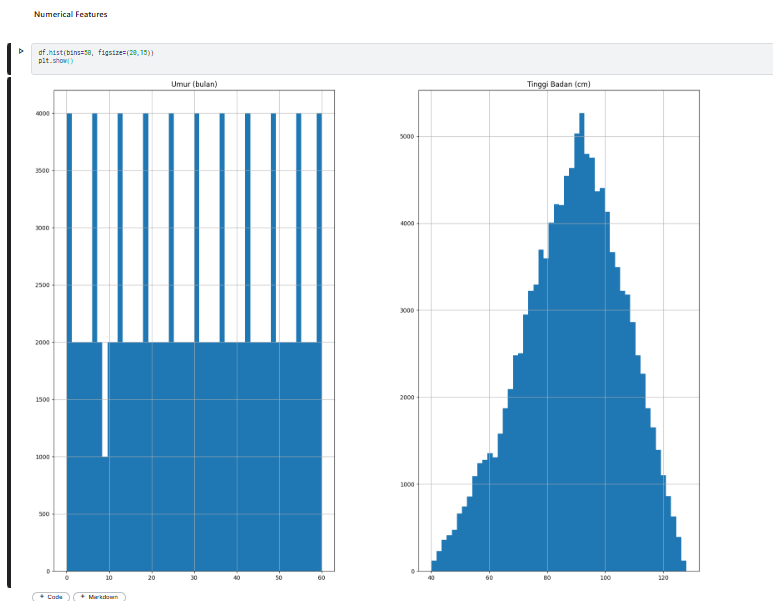

## Multivariate Analysis

### Categorical Features

C:\Users\HP\AppData\Local\Temp\ipykernel_26520\2971902276.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat_col, y=num_col, kind="bar", dodge=False, height=4, aspect=3, data=df, palette="Set3")


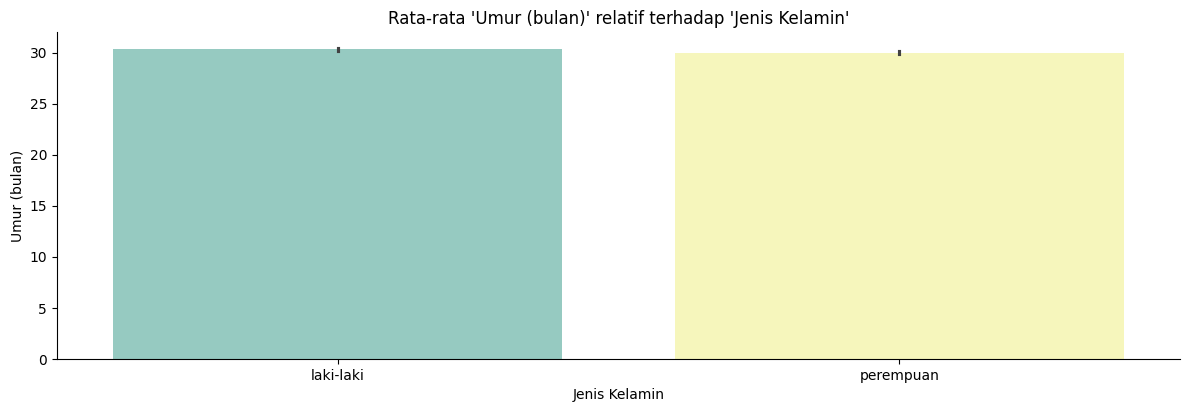

C:\Users\HP\AppData\Local\Temp\ipykernel_26520\2971902276.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat_col, y=num_col, kind="bar", dodge=False, height=4, aspect=3, data=df, palette="Set3")


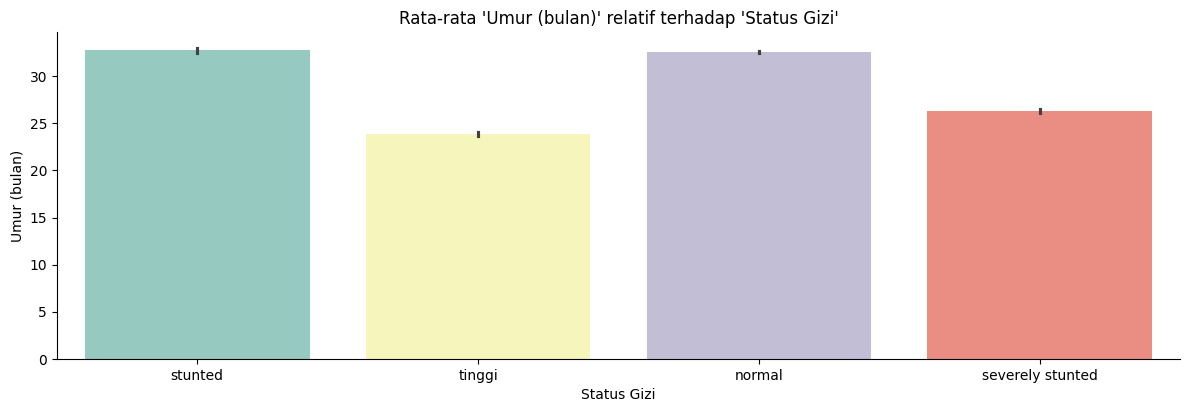

C:\Users\HP\AppData\Local\Temp\ipykernel_26520\2971902276.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat_col, y=num_col, kind="bar", dodge=False, height=4, aspect=3, data=df, palette="Set3")


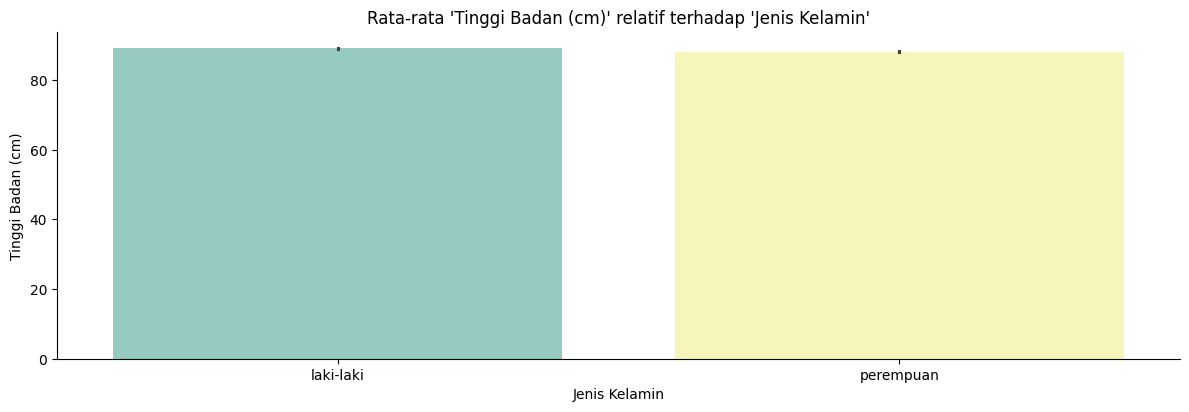

C:\Users\HP\AppData\Local\Temp\ipykernel_26520\2971902276.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat_col, y=num_col, kind="bar", dodge=False, height=4, aspect=3, data=df, palette="Set3")


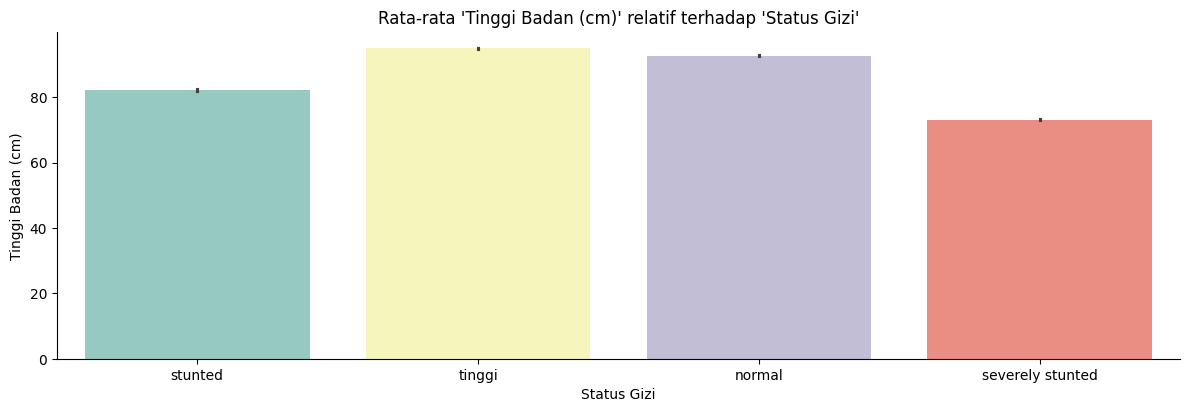

In [9]:
cat_features = df.select_dtypes(include='object').columns.to_list()
num_features = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

for num_col in num_features:
    for cat_col in cat_features:
        sns.catplot(x=cat_col, y=num_col, kind="bar", dodge=False, height=4, aspect=3, data=df, palette="Set3")
        plt.title(f"Rata-rata '{num_col}' relatif terhadap '{cat_col}'")
        plt.show()

1. Umur Rata-rata berdasarkan Jenis Kelamin
- Laki-laki memiliki rata-rata umur yang sedikit lebih tinggi dibandingkan perempuan.

- Perbedaan ini menunjukkan bahwa distribusi umur mungkin sedikit bergeser ke usia lebih tua pada laki-laki.

2. Umur Rata-rata berdasarkan Status Gizi
- Anak dengan status gizi kurus memiliki rata-rata umur tertinggi.

- Anak dengan status gizi sangat kurus memiliki umur rata-rata terendah.

Pola ini dapat mengindikasikan bahwa semakin kecil umur anak, semakin besar kemungkinan mereka mengalami masalah gizi serius.

3. Tinggi Badan Rata-rata berdasarkan Jenis Kelamin
- Rata-rata tinggi badan anak laki-laki sedikit lebih tinggi dibandingkan perempuan.

- Hal ini mencerminkan perbedaan pertumbuhan fisik yang wajar antara jenis kelamin.

4. Tinggi Badan Rata-rata berdasarkan Status Gizi
- Anak dengan status gizi baik memiliki tinggi badan rata-rata tertinggi.

- Anak dengan status gizi sangat kurus memiliki tinggi badan rata-rata terendah.

Ada korelasi positif antara status gizi dan tinggi badan: semakin baik status gizi, semakin tinggi tinggi badan rata-rata.

### Numerical Features

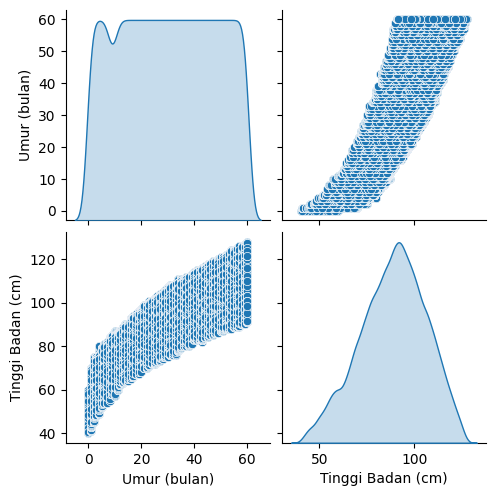

In [10]:
sns.pairplot(df, diag_kind = 'kde')

### Hubungan antara Umur dan Tinggi Badan

Terdapat korelasi positif kuat antara umur dan tinggi badan. Semakin bertambah umur, semakin tinggi tinggi badan anak.

Pola titik-titik menunjukkan bahwa pertumbuhan tinggi badan cenderung konsisten mengikuti pertambahan umur.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

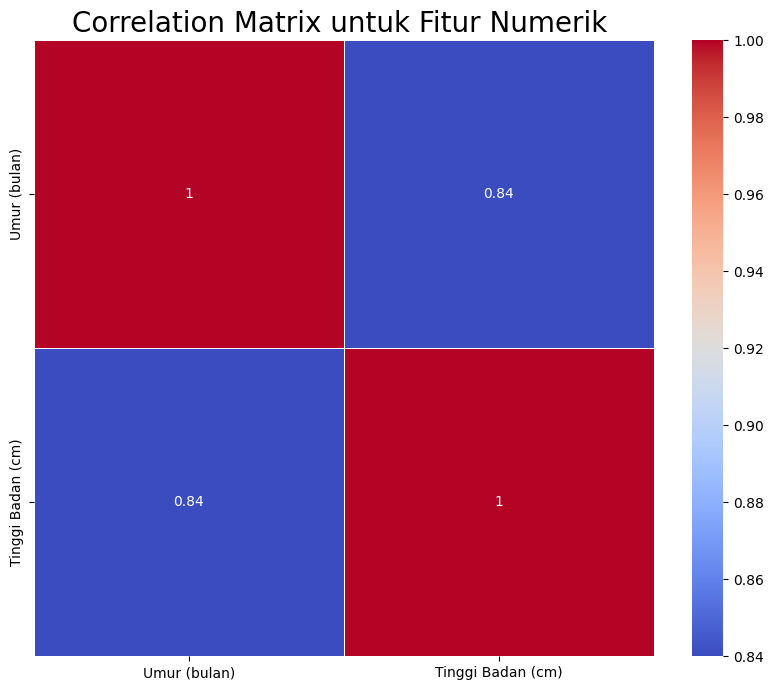

In [11]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)
 
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

### Insight Korelasi Umur dan Tinggi Badan
- Hubungan yang Kuat dan Positif

    - Nilai 0.84 berada dalam rentang korelasi kuat (umumnya antara 0.7–1.0).

    - Ini berarti semakin bertambah umur anak, semakin tinggi pula tinggi badannya — dan hubungan ini sangat konsisten dalam data.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Berikut adalah tahapan-tahapan yang bisa dilakukan:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Data Split

Proses terakhir adalah melakukan export dataset yang telat di lakukan preprocessing yang akan digunakan untuk modelling

## Menangani Missing Values

In [12]:
# Cek jumlah missing values pada dataset
df.isnull().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

Tidak ada missing values ketika dilakukan pengecekan, maka tidak perlu dilakukan apa-apa.

## Menghapus Data Duplikat

In [13]:
# Mengecek jumlah baris duplikat
jumlah_duplikat = df.duplicated().sum()

print(f"Jumlah data duplikat: {jumlah_duplikat}")

Jumlah data duplikat: 81574


Dilakukan pengecekan data duplikat dan ditemukan 81574 data duplikat.

In [14]:
# Menyimpan jumlah data awal sebelum penghapusan
jumlah_data_awal = df.shape[0]

# Menghapus baris duplikat
df = df.drop_duplicates()

# Menyimpan jumlah data setelah duplikat dihapus
jumlah_data_setelah = df.shape[0]

# Menghitung jumlah data yang dihapus
jumlah_dihapus = jumlah_data_awal - jumlah_data_setelah

# Menampilkan hasil
print(f"Jumlah data awal             : {jumlah_data_awal}")
print(f"Jumlah data setelah dihapus  : {jumlah_data_setelah}")
print(f"Jumlah data yang dihapus     : {jumlah_dihapus}")

Jumlah data awal             : 120999
Jumlah data setelah dihapus  : 39425
Jumlah data yang dihapus     : 81574


Untuk mengatasi data duplikat dilakukan penghapusan data. 
Jumlah data yang tersisa adalah 39425.

In [15]:
# Mengecek jumlah baris duplikat
jumlah_duplikat = df.duplicated().sum()

print(f"Jumlah data duplikat: {jumlah_duplikat}")

Jumlah data duplikat: 0


Setelah dilakukan pengecekan ulang, sudah tidak ada data duplikat.

## Normalisasi dengan metode Min-Max Scaling

Min-Max Scaling adalah metode normalisasi yang digunakan untuk mengubah nilai fitur ke dalam rentang 0 hingga 1. Teknik ini penting karena memastikan setiap fitur memiliki skala yang sama, sehingga tidak ada fitur yang mendominasi proses perhitungan hanya karena memiliki nilai numerik yang lebih besar. 

Hal ini sangat berguna untuk algoritma machine learning yang sensitif terhadap skala, seperti KNN, SVM, dan Neural Networks. Selain itu, Min-Max Scaling mempertahankan bentuk distribusi asli data, sehingga cocok digunakan saat data sudah relatif terdistribusi baik.

In [16]:
df.describe()

,Umur (bulan),Tinggi Badan (cm)
count,39425.000000,39425.000000
mean,28.301332,86.040251
std,19.260394,19.766565
min,0.000000,40.010437
25%,10.000000,72.100000
50%,29.000000,88.400000
75%,45.000000,100.800000
max,60.000000,128.000000


Dapat dilihat bahwa data masih memiliki rentang yang tidak sama / bukan 0 hingga 1.

In [17]:
# Salin dataframe jika perlu
df = df.copy()

# Fitur numerik
num_features = ['Umur (bulan)', 'Tinggi Badan (cm)']

# Ubah ke float agar kompatibel dengan hasil MinMaxScaler
df[num_features] = df[num_features].astype(float)

# Inisialisasi dan transformasi
scaler = MinMaxScaler()
df.loc[:, num_features] = scaler.fit_transform(df[num_features])

Kode diatas adalah kode untuk melakukan normalisasi dengan MinMaxScaler

In [18]:
df.describe()

,Umur (bulan),Tinggi Badan (cm)
count,39425.000000,39425.000000
mean,0.471689,0.523128
std,0.321007,0.224647
min,0.000000,0.000000
25%,0.166667,0.364697
50%,0.483333,0.549947
75%,0.750000,0.690872
max,1.000000,1.000000


Hasilnya data memiliki nilai Min = 0 dan Max = 1

## Deteksi dan Penanganan Outlier

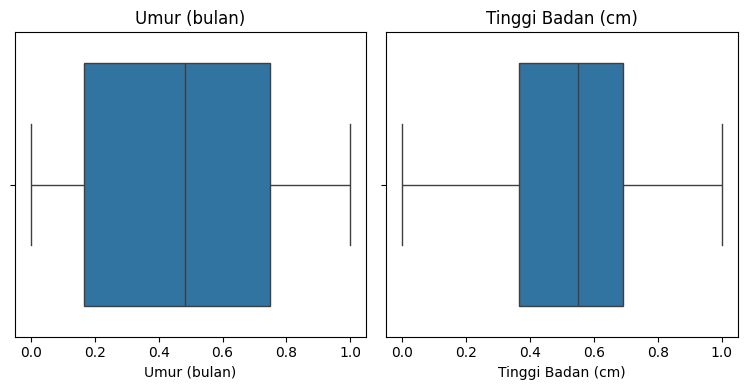

In [19]:
# Mendeteksi outlier pada dataset
num_features = df.select_dtypes(include=['number']).columns
num_plots = len(num_features)
rows = (num_plots // 4) + (num_plots % 4 > 0)
fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, feature in enumerate(num_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Diatas adalah pengecekan outlier dengan visualisasi data ke boxplot. Tidak ada outlier yang terlihat.

In [20]:
# Menghitung dan menampilkan jumlah outlier per fitur numerik
num_features = df.select_dtypes(include=['number']).columns
outlier_counts = {}

for feature in num_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_counts[feature] = len(outliers)

for feature, count in outlier_counts.items():
    print(f"{feature}: {count} outlier(s)")

Umur (bulan): 0 outlier(s)
Tinggi Badan (cm): 0 outlier(s)


Dilakukan perhitungan dan pengecekan outlier dengan metode IQR. Metode Interquartile Range (IQR) digunakan untuk mendeteksi outlier (nilai pencilan) dalam data. IQR dihitung sebagai selisih antara kuartil ketiga (Q3) dan kuartil pertama (Q1). Hasilnya dapat dipastikan tidak ada outlier dalam dataset.

## Encoding Data Kategorikal

Encoding Data Kategorikal adalah proses mengubah data kategorikal menjadi format numerik agar dapat digunakan dalam algoritma machine learning yang hanya memahami data angka. Tujuannya adalah agar model dapat memproses informasi dari variabel kategorikal secara efektif. 

Metode yang akan digunakan: 
1. One-Hot Encoding, yang mengubah kategori “Jenis Kelamin” menjadi kolom biner (0 atau 1) untuk tiap kategori.
2. Label Encoding manual untuk “Status Gizi”, di mana setiap label diganti dengan angka yang mewakili urutan atau klasifikasi tertentu.

Metode ini membantu menyederhanakan data tanpa kehilangan makna kategorikalnya.

In [21]:
# Salin dataframe agar data asli aman
df_encoded = df.copy()

# One-Hot Encoding untuk 'Jenis Kelamin'
df_encoded = pd.get_dummies(df_encoded, columns=['Jenis Kelamin'], drop_first=True)
df_encoded['Jenis Kelamin_perempuan'] = df_encoded['Jenis Kelamin_perempuan'].astype(int)

# Mapping label untuk 'Status Gizi'
mapping_status_gizi = {
    'normal': 0,
    'stunted': 1,
    'severely stunted': 2,
    'tinggi': 3
}

# Label Encoding Manual dengan Mapping
df_encoded['Status Gizi'] = df_encoded['Status Gizi'].map(mapping_status_gizi)

# Cek hasil encoding
print(df_encoded.head())

   Umur (bulan)  Tinggi Badan (cm)  Status Gizi  Jenis Kelamin_perempuan
0           0.0           0.052069            1                        0
1           0.0           0.189736            3                        0
2           0.0           0.077883            0                        0
3           0.0           0.085210            0                        0
4           0.0           0.031061            2                        0


Diatas adalah struktur dataset akhir setelah preprocessing.

## Data Split

Setelah proses Encoding, akan dilakukan pembagian dataset dengan perbandingan 80% Data train dan 20% Data test yang nantinya akan digunakan di proses modelling.

In [22]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=["Status Gizi"])  # Semua kolom kecuali target
y = df["Status Gizi"]                 # Hanya kolom target

# Bagi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Export Dataset Preprocessing

Langkah terakhir adalah melakukan export dataset ke csv untuk digunakan di modelling.

In [23]:
# Save data hasil preprocessing
folder = "data_balita_preprocessing"
if not os.path.exists(folder):
    os.makedirs(folder)

X_train.to_csv(f"{folder}/X_train.csv", index=False)
X_test.to_csv(f"{folder}/X_test.csv", index=False)
y_train.to_csv(f"{folder}/y_train.csv", index=False)
y_test.to_csv(f"{folder}/y_test.csv", index=False)

print("Data preprocessing berhasil disimpan")

Data preprocessing berhasil disimpan
